# Umwandlung von Video in Numpy-Arrays

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import av
from scipy import ndimage 

In [134]:
# load frame and create array

videoSlice = True

container = av.open("./original_videos/grosseLoecher_20grad.MOV")

if videoSlice:
    imgList = []

for frame in container.decode(video=0):
    if videoSlice:
        if frame.index >= 120 and frame.index <= 1320:
            imgList.append(frame.to_image().convert("L"))
            print("Export of frame: ", frame.index)
    else:
        if frame.index == 250:
            img = frame.to_image().convert("L")
            print("Export of frame: ", frame.index)
    maxIndex = frame.index

print("Total Frames: ", maxIndex)

if videoSlice: 
    arrayVideo = np.asarray(imgList)
else:
    array = np.asarray(img)


deprecated pixel format used, make sure you did set range correctly
 (repeated 806 more times)
deprecated pixel format used, make sure you did set range correctly


Export of frame:  120
Export of frame:  121
Export of frame:  122
Export of frame:  123
Export of frame:  124
Export of frame:  125
Export of frame:  126
Export of frame:  127
Export of frame:  128
Export of frame:  129
Export of frame:  130
Export of frame:  131
Export of frame:  132
Export of frame:  133
Export of frame:  134
Export of frame:  135
Export of frame:  136
Export of frame:  137
Export of frame:  138
Export of frame:  139
Export of frame:  140
Export of frame:  141
Export of frame:  142
Export of frame:  143
Export of frame:  144
Export of frame:  145
Export of frame:  146
Export of frame:  147
Export of frame:  148
Export of frame:  149
Export of frame:  150
Export of frame:  151
Export of frame:  152
Export of frame:  153
Export of frame:  154
Export of frame:  155
Export of frame:  156
Export of frame:  157
Export of frame:  158
Export of frame:  159
Export of frame:  160
Export of frame:  161
Export of frame:  162
Export of frame:  163
Export of frame:  164
Export of 

In [118]:
if videoSlice:
    print(arrayVideo.shape)
else:
    print(array.shape)

(1201, 1080, 1920)


In [140]:
# masking the frame

if videoSlice:
    frames = arrayVideo#[:, 100:950, 530:1380]
else:    
    frame = array[100:950, 530:1380]

In [93]:
# mean of frame

if not videoSlice:
    print(frame.mean(), frame.max(), frame.min(), frame.std(), frame.shape)

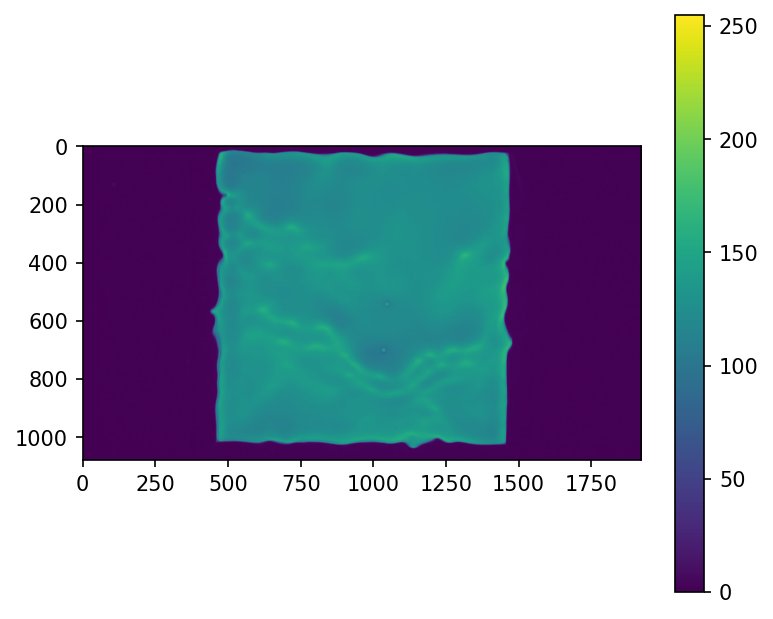

In [141]:
# plot of frame

if videoSlice:
    image = frames[800, :, :]
else:
    image = frame[:, :]

fig, ax = plt.subplots(1, 1, dpi = 150, figsize = (6,5))

plot1 = ax.imshow(image, vmin = 0, vmax = 255)
fig.colorbar(plot1)

In [137]:
# save frame data and plot

frameName = "grosseLoecher_20grad"

#fig.savefig("./frames/" + frameName + ".jpg")

if videoSlice:
    np.save("./frames/" + frameName + ".npy", frames)
else:
    np.save("./frames/" + frameName + ".npy", frame)

In [143]:
frames.dtype

dtype('uint8')

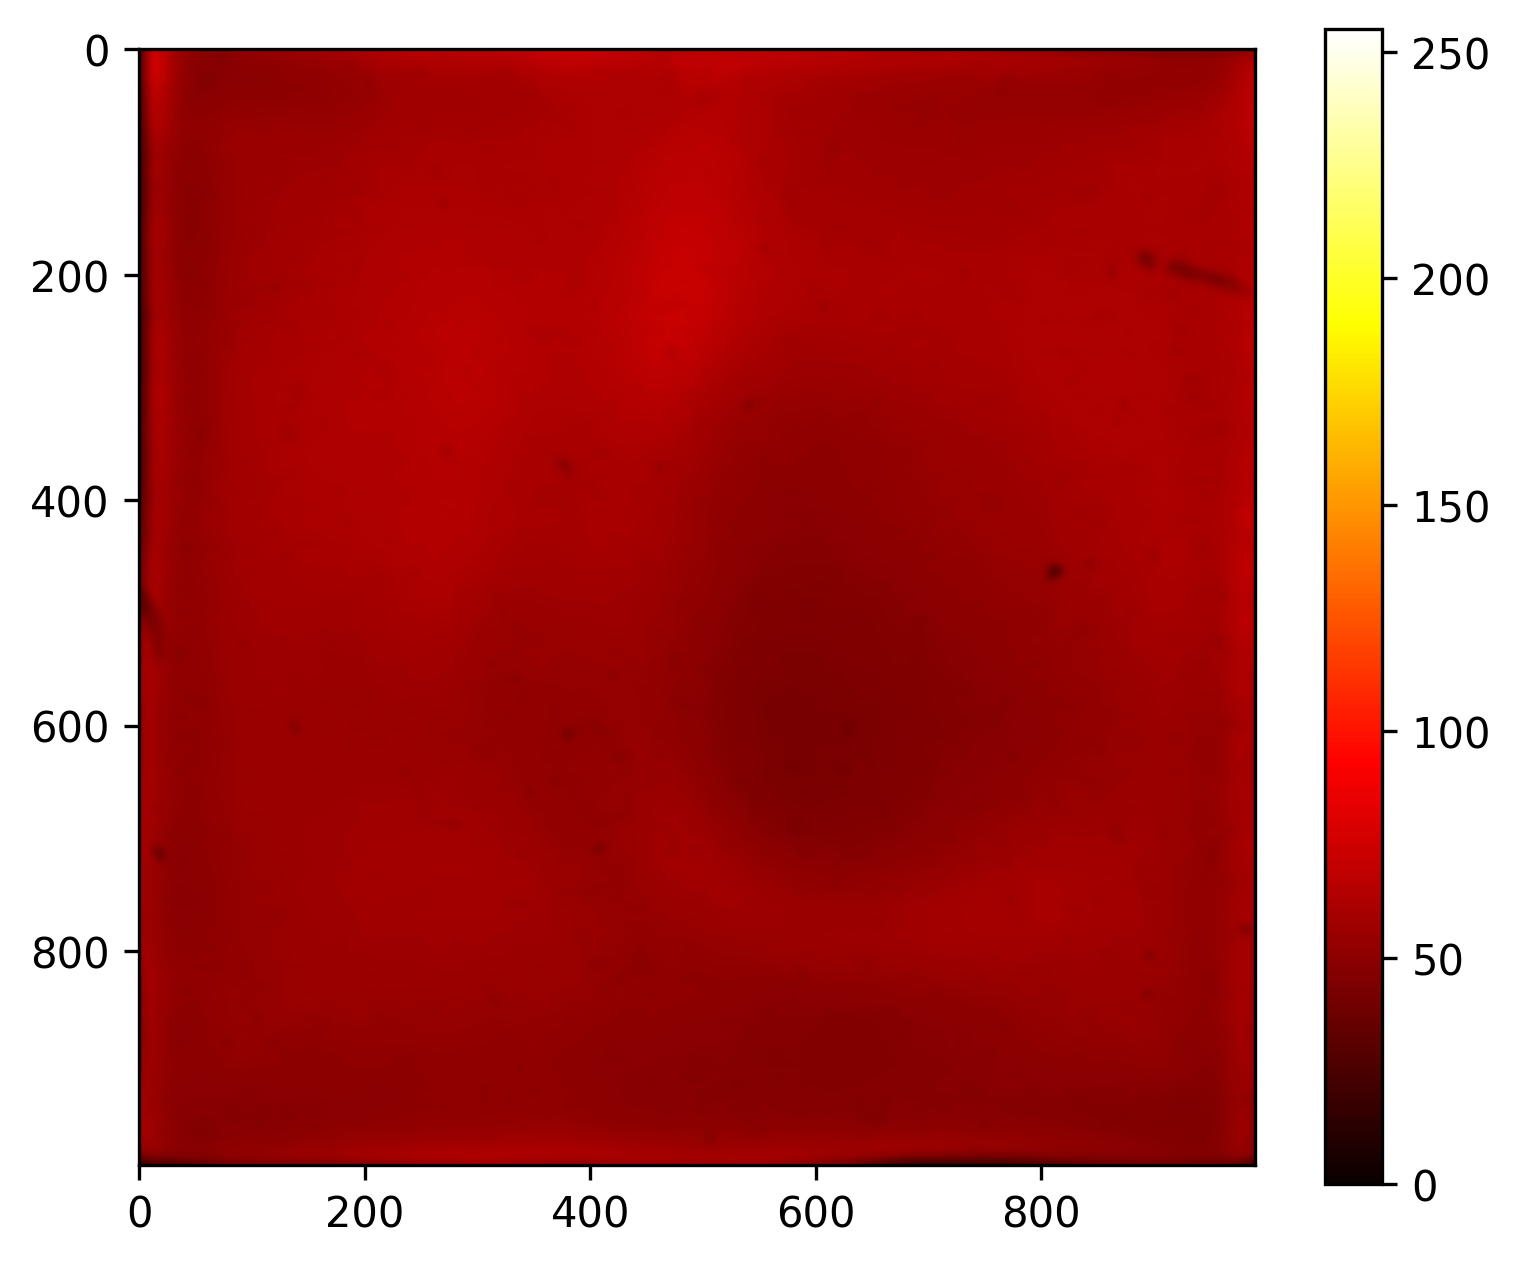

In [25]:
# smoothing image and replot

frame_smoothed = ndimage.gaussian_filter(frames[440], sigma = 4, order = 0, radius = None)

fig, ax = plt.subplots(1, 1, dpi = 300, figsize = (6,5))

plot1 = ax.imshow(frame_smoothed[:, :], vmin = 0, vmax = 255, cmap = "hot")
fig.colorbar(plot1)